In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.datasets import make_blobs

# good tool to make meaningful data :) with sample size, y-centers, x-features & random_state
X, y = make_blobs(n_samples=10, centers=3, n_features=4, random_state=5)

In [20]:
X

array([[ 0.5612771 ,  1.60330563,  5.31196222,  0.26729215],
       [-7.07131614,  8.05949363, -6.84622478,  7.515365  ],
       [-6.75290119,  7.20976961, -6.22444584,  8.97568976],
       [-4.15086557, -4.68404313, -8.69102765,  4.29107451],
       [-0.28408437,  2.48409492,  5.51581722,  1.70320833],
       [-6.43201576,  6.99213819, -4.86917707,  9.08463943],
       [-0.17263198,  1.87156638,  5.32144597,  0.26242932],
       [-7.22492511,  6.71446709, -4.71422588, 10.22954917],
       [-2.92464699, -5.75113503, -8.72151088,  4.66819158],
       [-3.96325178, -5.89013695, -8.11556222,  6.06076931]])

In [12]:
y

array([1, 2, 1, 0, 0, 0, 0, 2, 2, 1])

array([0, 1])

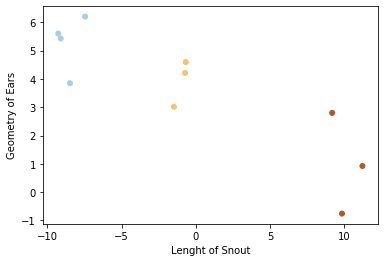

In [13]:
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap=plt.cm.Paired)

# How would you teach a 5 year old to differentiate a dog from a cat? 
# well! then you should not explain SVM model, but of course you can teach 
# the principles behind the SVM model - dogs has longer Snout whereas cats have sharp ears.

plt.ylabel('Geometry of Ears')
plt.xlabel('Lenght of Snout')

# Now lets predict if its a dog or cat with ear shape and Snout length.
testData = [[-8,7],[-1,5]]
svm_model.predict(testData)

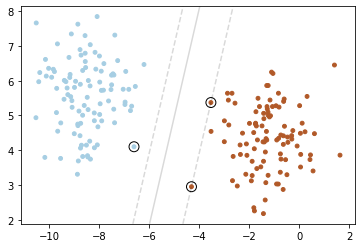

In [27]:
# Now lets open the hood and see inside the SVM Model
X, y = make_blobs(n_samples=200, centers=2, random_state=7)

svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap=plt.cm.Paired)

# plot the decision function with get current axes (both x & y axis)
axes = plt.gca()
xLimit = axes.get_xlim()
yLimit = axes.get_ylim()

# create grid to evaluate model
xUnit = np.linspace(xLimit[0], xLimit[1], 13)
yUnit = np.linspace(yLimit[0], yLimit[1], 13)
yGrid, xGrid = np.meshgrid(yUnit, xUnit)
xyArray = np.vstack([xGrid.ravel(), yGrid.ravel()]).T
Z = svm_model.decision_function(xyArray).reshape(xGrid.shape)

# Linear Hyperplane with level=0, solid straight lines and Margins with dotted lines, levels= +1 or -1.
axes.contour(xGrid, yGrid, Z, colors='k', levels=[-0.5, 0, 1], 
             alpha=0.15, linestyles=['--', '-', '--'])

# plot support vectors(data points) on margin lines, D+ plus D- is margin distance.
axes.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], 
             s=99, linewidth=1, facecolors='none', edgecolors='k')
plt.show()